<a href="https://colab.research.google.com/github/janasamra/Sales-Time-Series-Prediction/blob/main/Sales_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Task:
**Sales Prediction**
### objective
Predict the sales for the next 10 days for each product across different cities. This involves analyzing historical sales data to identify patterns and trends, applying appropriate time series forecasting techniques, and generating accurate sales forecasts for future periods. The predictions will assist businesses in inventory management, demand planning, and overall sales strategy.


## 1- Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")
sns.cubehelix_palette(as_cmap=True)
import matplotlib.pyplot as plt
%matplotlib inline
import holidays
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## 2- Data Cleaning



In [ ]:
# Reading the data
df=pd.read_csv("/content/drive/MyDrive/datasets/projectdata.xlsx - sheet 1.csv")
# First 5 rows of the data
df.head()

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
0,33,16.0,20.0,2021-10-29T03:33:52Z,16.0,product y,Bahary,North
1,30,16.0,20.0,2021-10-23T12:29:27Z,16.0,product y,Dar El-Salam,Cairo
2,2,45.0,30.0,2021-08-03T09:14:16Z,45.0,product z,Miamy,North
3,3,16.0,3.0,2021-08-17T09:00:50Z,16.0,product y,Miamy,North
4,1,45.0,27.0,2021-09-06T19:57:02Z,45.0,product z,Miamy,North


In [ ]:
# Last 5 rows in the data
df.tail()

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
2990,2,99.0,33.0,2022-12-05T09:48:42Z,99.0,product x,Dokki and Mohandessin,Giza
2991,2,99.0,33.0,2022-12-21T00:00:28Z,99.0,product x,Dokki and Mohandessin,Giza
2992,5,45.0,31.0,2022-12-27T08:43:38Z,45.0,product z,Dokki and Mohandessin,Giza
2993,1,99.0,32.0,2022-11-26T09:16:45Z,0.0,product x,El-Agamy,North
2994,2,99.0,33.0,2023-01-06T22:35:26Z,0.0,product x,El-Agamy,North


In [ ]:
# Shape of the data (rows,columns)
df.shape

(2995, 8)

In [ ]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      2995 non-null   int64  
 1   UnitePrice    2995 non-null   float64
 2   discount      2995 non-null   float64
 3   date          2995 non-null   object 
 4   retail price  2995 non-null   float64
 5   product_name  2995 non-null   object 
 6   area          2970 non-null   object 
 7   city          2995 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 187.3+ KB


In [ ]:
# Statistics about the numerical data
df.describe()

,quantity,UnitePrice,discount,retail price
count,2995.000000,2995.000000,2995.000000,2995.000000
mean,7.705509,60.555426,25.917225,59.615776
std,100.466019,35.270286,14.124298,36.944778
min,1.000000,10.000000,-1.000000,0.000000
25%,2.000000,16.000000,20.000000,16.000000
50%,3.000000,45.000000,31.000000,45.000000
75%,5.000000,99.000000,33.000000,99.000000
max,5000.000000,102.000000,561.000000,102.000000


In [ ]:
# Create a new 'sales' column
df['sales'] = df['quantity'] * df['UnitePrice']

In [ ]:
# check for null values in the data
df.isnull().sum()

,0
quantity,0
UnitePrice,0
discount,0
date,0
retail price,0
product_name,0
area,25
city,0
sales,0


**Noticed** that 'area' column has 25 null values

In [ ]:
# fill null values in 'area' with 'unknown'
df['area']=df['area'].fillna('unknown')
# check that the null values are filled
print("\nNull Values After Filling:")
df.isnull().sum()


Null Values After Filling:


,0
quantity,0
UnitePrice,0
discount,0
date,0
retail price,0
product_name,0
area,0
city,0
sales,0


####**The data now is clean** with no null values.

In [ ]:
# Unique values in 'city' and 'product' columns
print("city values:", df['city'].unique())
print("product values:" , df['product_name'].unique())

city values: ['North' 'Cairo' 'Giza']
product values: ['product y' 'product z' 'product x ']


In [ ]:
# Convert 'date' to datetime and set as index
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

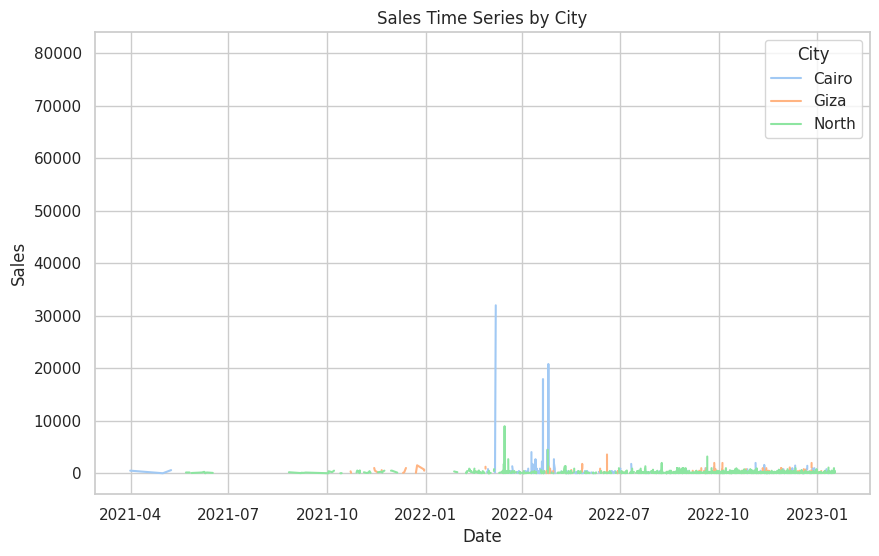

In [ ]:
# Group data by city and date to plot sales time series
city_sales = df.groupby(['city', 'date'])['sales'].sum().unstack(level=0)

plt.figure(figsize=(10, 6))
for city in city_sales.columns:
    plt.plot(city_sales.index, city_sales[city], label=city)
plt.title("Sales Time Series by City")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="City")
plt.grid(True)
plt.show()

###**Noticed:**
The Dates from 2021 to April 2022 contains a lot of missing data so it is prefered to remove the whole 2021 year from the data

In [ ]:
# Remove data from 2021 to 2022-04 due to missing information
df = df[~((df.index >= '2021-01-01') & (df.index < '2022-04-01'))]
df.head()

,quantity,UnitePrice,discount,retail price,product_name,area,city,sales
date,,,,,,,,
2022-05-20 19:54:22+00:00,1,16.0,1.0,16.0,product y,Hadayek El-Kobba,Cairo,16.0
2022-05-22 07:47:49+00:00,2,16.0,1.0,16.0,product y,Hadayek El-Kobba,Cairo,32.0
2022-09-20 14:16:10+00:00,2,99.0,36.0,99.0,product x,Ain Shams,Cairo,198.0
2022-11-21 11:44:46+00:00,3,99.0,33.0,99.0,product x,Ain Shams,Cairo,297.0
2022-11-21 11:44:46+00:00,4,45.0,31.0,45.0,product z,Ain Shams,Cairo,180.0


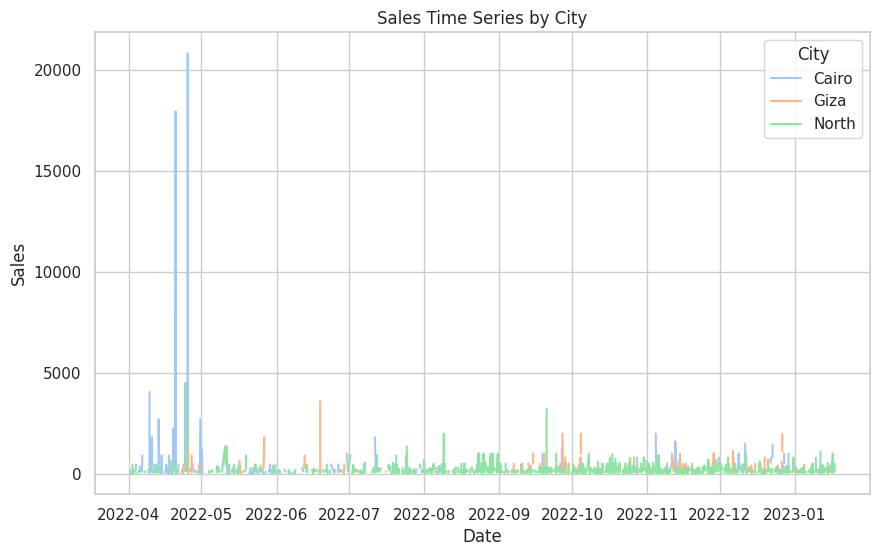

In [ ]:
# Check that the data is removed
city_sales = df.groupby(['city', 'date'])['sales'].sum().unstack(level=0)

plt.figure(figsize=(10, 6))
for city in city_sales.columns:
    plt.plot(city_sales.index, city_sales[city], label=city)

plt.title("Sales Time Series by City")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="City")
plt.grid(True)
plt.show()

### Data Resampling and Interpolation

In [ ]:
# Resample the data based on day frequency
df_filled = df.groupby(['product_name', 'city']).resample('D').sales.mean()
# Interpolate missing sales data
df_filled = df_filled.interpolate(method='linear')
# Reset index to flatten the DataFrame
df_filled = df_filled.reset_index()
# Check for missing data after interpolation
missing_after_interpolation = df_filled.isnull().sum()
print("Missing data after interpolation:\n",missing_after_interpolation)
df_filled.head(10)

Missing data after interpolation:
 product_name    0
city            0
date            0
sales           0
dtype: int64


,product_name,city,date,sales
0,product x,Cairo,2022-04-01 00:00:00+00:00,89.750000
1,product x,Cairo,2022-04-02 00:00:00+00:00,269.250000
2,product x,Cairo,2022-04-03 00:00:00+00:00,239.333333
3,product x,Cairo,2022-04-04 00:00:00+00:00,239.333333
4,product x,Cairo,2022-04-05 00:00:00+00:00,239.333333
5,product x,Cairo,2022-04-06 00:00:00+00:00,583.375000
6,product x,Cairo,2022-04-07 00:00:00+00:00,448.750000
7,product x,Cairo,2022-04-08 00:00:00+00:00,605.812500
8,product x,Cairo,2022-04-09 00:00:00+00:00,762.875000
9,product x,Cairo,2022-04-10 00:00:00+00:00,560.937500


In [ ]:
# Normalizes the index to remove the time component, leaving only the date part
df.index = df.index.normalize()
df_filled['date'] = df_filled['date'].dt.normalize()

In [ ]:
# Ensure 'date' is in datetime format for both DataFrames
df.index = pd.to_datetime(df.index)
df_filled['date'] = pd.to_datetime(df_filled['date'])

# Reset index of df to ensure 'date' is a column
df.reset_index(inplace=True)

# Merge the data using an outer join to keep all rows from both DataFrames
df_final = pd.merge(
    df,
    df_filled,
    on=['date', 'product_name', 'city'],
    how='outer',
    suffixes=('_original', '_filled')
)

# Get a list of columns that are present in both dataframes for merging
common_cols = [col for col in df.columns if col not in ['date', 'product_name', 'city']]

# Combine columns where data exists, prioritizing original data
for col in common_cols:
    col_original = f"{col}_original"
    col_filled = f"{col}_filled"
    if col_original in df_final.columns and col_filled in df_final.columns:
        df_final[col] = df_final[col_original].combine_first(df_final[col_filled])

# Drop intermediate columns if they exist
cols_to_drop = [col for col in df_final.columns if col.endswith('_original') or col.endswith('_filled')]
df_final.drop(columns=cols_to_drop, inplace=True)

# Sort the data by 'date' to ensure chronological order
df_final.sort_values(by=['date', 'product_name', 'city'], inplace=True)

# Check the final DataFrame
df_final.head(10)


,date,quantity,UnitePrice,discount,retail price,product_name,area,city,sales
0,2022-04-01 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,Nasr City,Cairo,89.75
1,2022-04-01 00:00:00+00:00,1.0,16.00,0.0,16.0,product y,El-Seyouf,North,16.00
2,2022-04-01 00:00:00+00:00,1.0,45.00,29.0,45.0,product z,Nasr City,Cairo,45.00
3,2022-04-01 00:00:00+00:00,3.0,45.00,31.0,45.0,product z,El-Agamy,North,135.00
4,2022-04-01 00:00:00+00:00,1.0,45.00,30.0,45.0,product z,San Stefano,North,45.00
5,2022-04-02 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,Nasr City,Cairo,89.75
6,2022-04-02 00:00:00+00:00,5.0,89.75,32.0,99.0,product x,El-Maadi,Cairo,448.75
7,2022-04-02 00:00:00+00:00,2.0,89.75,32.0,99.0,product x,El-Seyouf,North,179.50
8,2022-04-02 00:00:00+00:00,2.0,89.75,32.0,99.0,product x,Fleming,North,179.50
9,2022-04-02 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,El-Seyouf,North,89.75


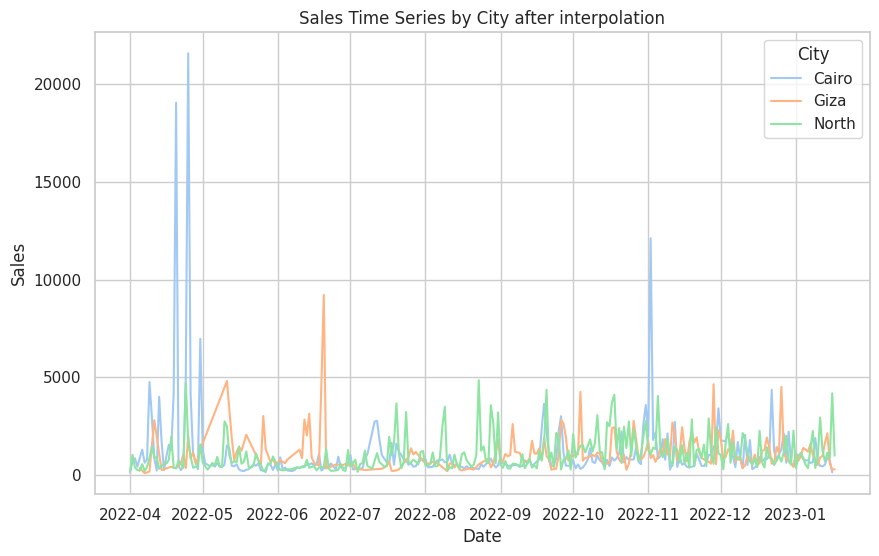

In [ ]:
# Group data by city and date to plot sales time series after interpolation
city_sales = df_final.groupby(['city', 'date'])['sales'].sum().unstack(level=0)

plt.figure(figsize=(10, 6))
for city in city_sales.columns:
    plt.plot(city_sales.index, city_sales[city], label=city)

plt.title("Sales Time Series by City after interpolation")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="City")
plt.grid(True)
plt.show()

In [ ]:
# Set 'date' as index
df_final.set_index('date', inplace=True)

###  Outlier Detection and Capping



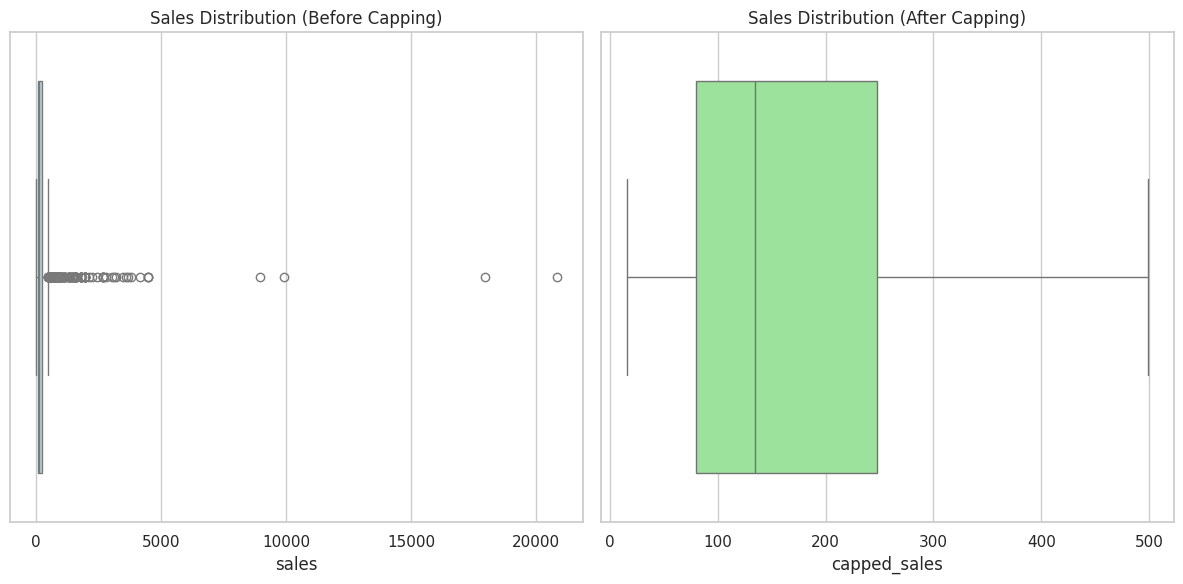

In [ ]:
# IQR method to detect outliers
Q1 = df_final['sales'].quantile(0.25)
Q3 = df_final['sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a copy of sales data for capping
capped_sales = df_final['sales'].copy()

# Capping outliers
capped_sales = np.where(capped_sales > upper_bound, upper_bound, capped_sales)
capped_sales = np.where(capped_sales < lower_bound, lower_bound, capped_sales)

# Adding the capped sales to the DataFrame for comparison
df_final['capped_sales'] = capped_sales

# Visualizing before and after capping using boxplots
plt.figure(figsize=(12, 6))

# Boxplot before capping
plt.subplot(1, 2, 1)
sns.boxplot(x=df_final['sales'], color='lightblue')
plt.title('Sales Distribution (Before Capping)')

# Boxplot after capping
plt.subplot(1, 2, 2)
sns.boxplot(x=df_final['capped_sales'], color='lightgreen')
plt.title('Sales Distribution (After Capping)')

plt.tight_layout()
plt.show()


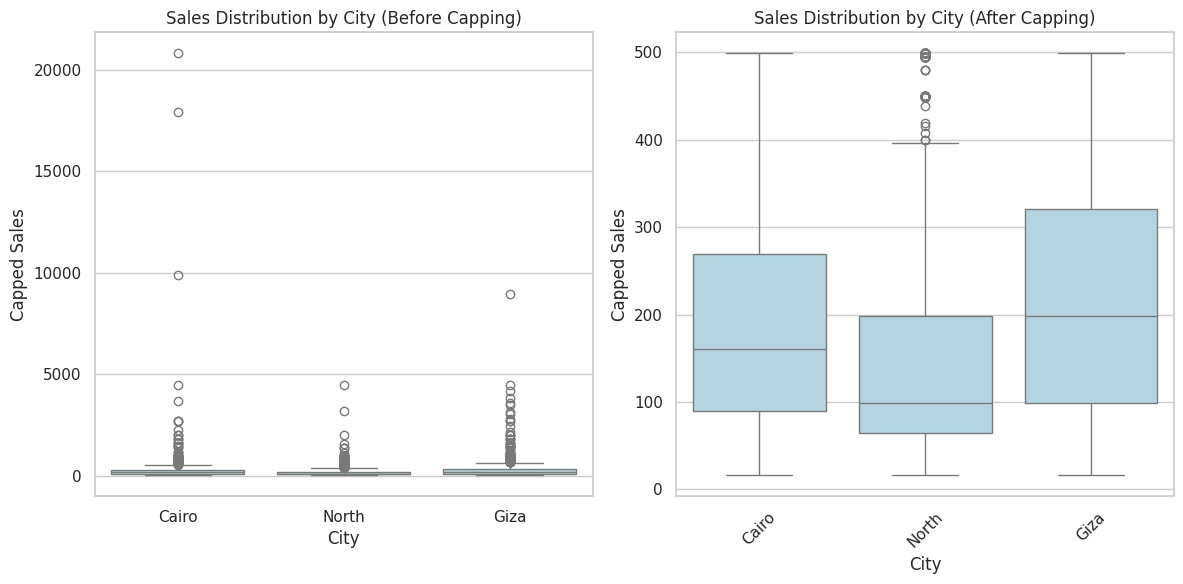

In [ ]:
# Boxplot for sales distribution by city before capping
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='city', y='sales', data=df_final,color='lightblue')
plt.title('Sales Distribution by City (Before Capping)')
plt.xlabel('City')
plt.ylabel('Capped Sales')

# Boxplot for sales distribution by city after capping
plt.subplot(1, 2, 2)
sns.boxplot(x='city', y='capped_sales', data=df_final,color='lightblue')
plt.title('Sales Distribution by City (After Capping)')
plt.xlabel('City')
plt.ylabel('Capped Sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

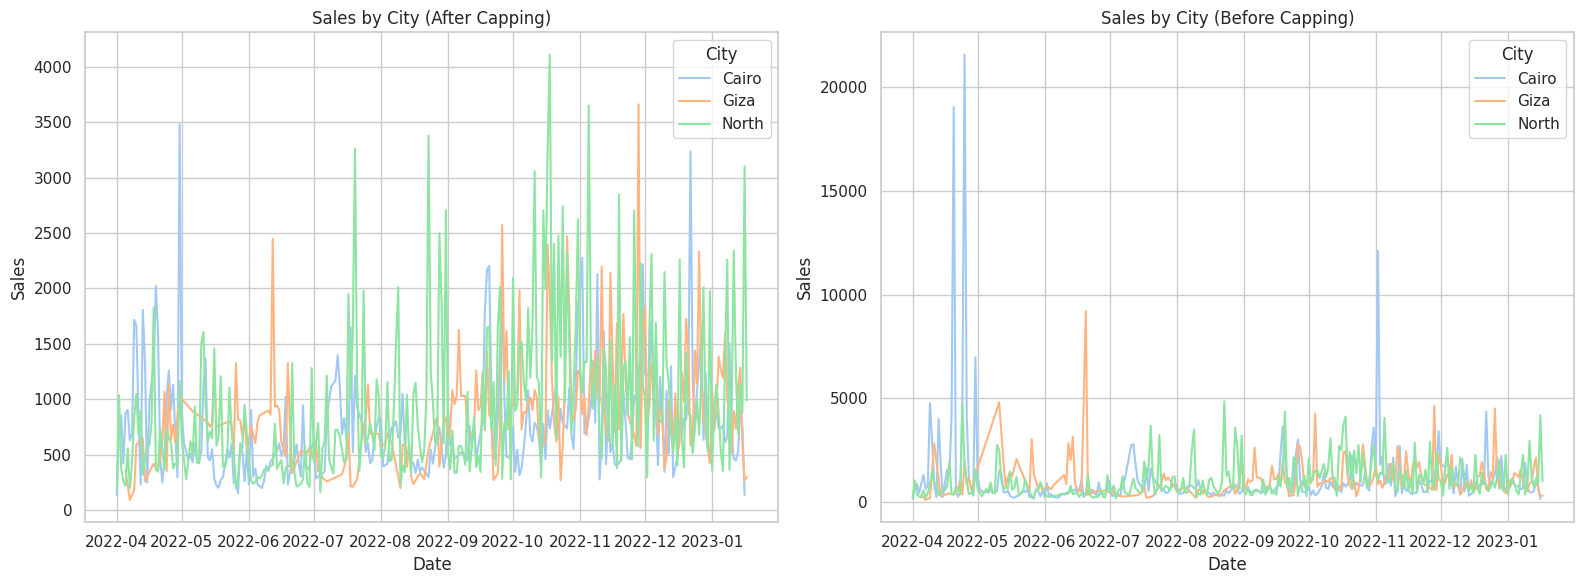

In [ ]:
# Create the figure
plt.figure(figsize=(16, 6))

# Plot for sales after capping
plt.subplot(1, 2, 1)
city_sales_capped = df_final.groupby(['city', 'date'])['capped_sales'].sum().unstack(level=0)
for city in city_sales_capped.columns:
    plt.plot(city_sales_capped.index, city_sales_capped[city], label=city)

plt.title("Sales by City (After Capping)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="City")
plt.grid(True)

# Plot for sales before capping
plt.subplot(1, 2, 2)
city_sales_uncapped = df_final.groupby(['city', 'date'])['sales'].sum().unstack(level=0)
for city in city_sales_uncapped.columns:
    plt.plot(city_sales_uncapped.index, city_sales_uncapped[city], label=city)

plt.title("Sales by City (Before Capping)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="City")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

## 3- EDA(exploratory data analysis)

In [ ]:
# group the data by 'city' and 'date' to calculate total sales per day in each city
city_sales_by_date= df_final.groupby(['city','date']).agg({'sales':'sum'}).reset_index()

# group the data by 'city' and 'sales' to calculate city with most sales
city_total_sales= df_final.groupby(['city']).agg({'sales':'sum'}).reset_index()

# group the data by 'city' and 'quantity' to calculate city with most qantities
city_sales_by_quantity= df_final.groupby(['city']).agg({'quantity':'sum'}).reset_index()

# group data bt 'city' and 'product' to calculate total sales and quantities for each product in each city
city_sales_by_product= df_final.groupby(['city','product_name']).agg({'sales':'sum'}).reset_index()
city_quantity_by_product= df_final.groupby(['city','product_name']).agg({'quantity':'sum'}).reset_index()


# Create a new column for the day of the week
city_sales_by_date['Day_of_Week'] = city_sales_by_date['date'].dt.dayofweek

# Group by Day of the Week and City, summing the sales
sales_by_day_and_city = city_sales_by_date.groupby(['Day_of_Week', 'city'])['sales'].sum().reset_index()

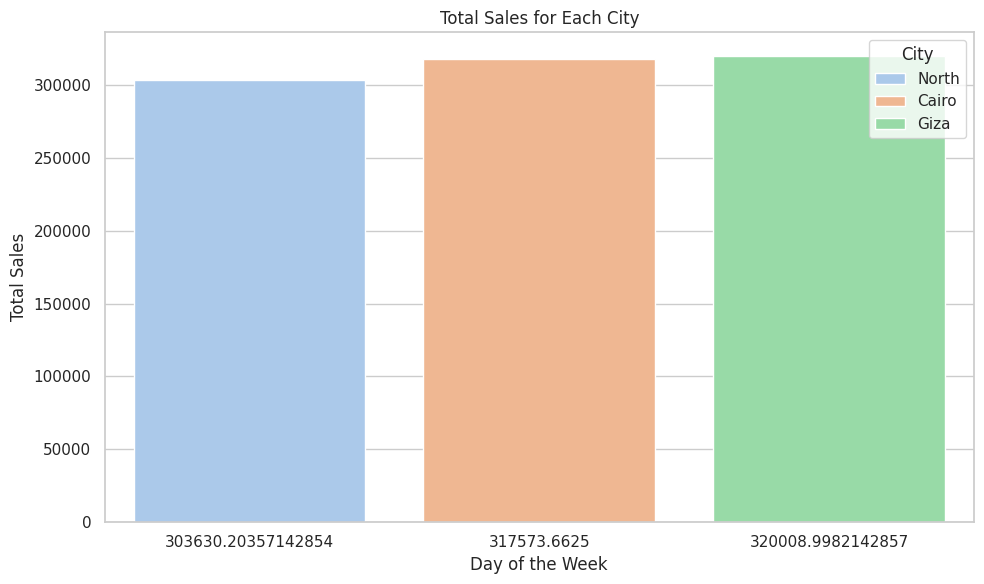

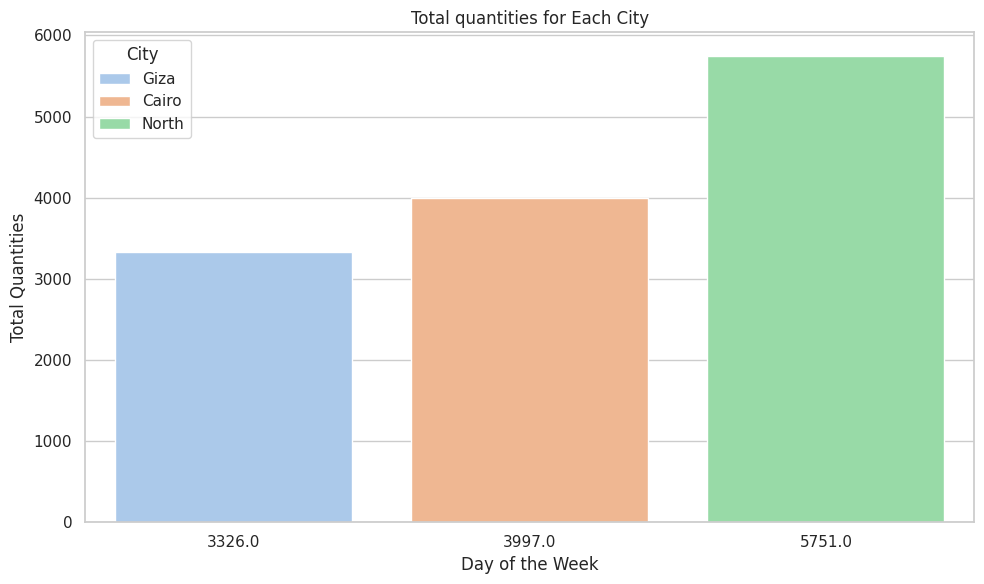

In [ ]:
# Plot total sales for each city
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='sales', hue='city', data=city_total_sales ,palette="pastel")
plt.title('Total Sales for Each City')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.legend(title='City')
plt.tight_layout()
plt.show()

# Plot total quantity for each city
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='quantity', hue='city', data=city_sales_by_quantity,palette="pastel")
plt.title('Total quantities for Each City')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantities')
plt.legend(title='City')
plt.tight_layout()
plt.show()

###**Insights:**

* Giza has the highest total sales.
* North has the lowest total sales
* North has the highest total quantity sold.
* Giza has the lowest total quantity sold.



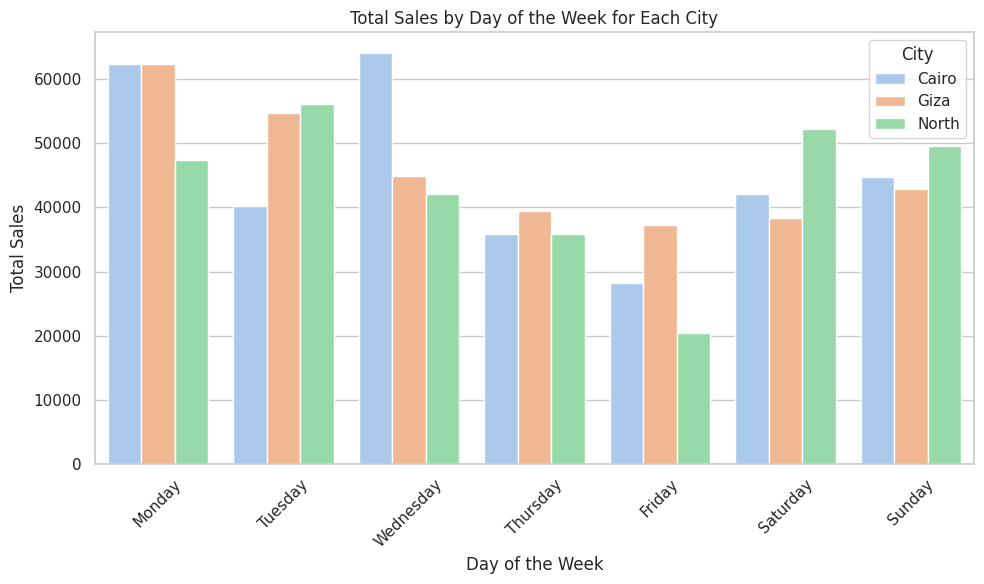

In [ ]:
# Plot total sales by day of the week for each city
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Day_of_Week', y='sales', hue='city', data=sales_by_day_and_city,palette="pastel")
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.title('Total Sales by Day of the Week for Each City')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.legend(title='City')
plt.tight_layout()
plt.show()

###**Insights:**

* Cairo consistently has the highest sales on most days of the week.
* Giza has the lowest sales on most days of the week.
* Monday and Tuesday seem to be the strongest days for sales across all cities.
* The total sales are less on the weekends than on the weekdays.

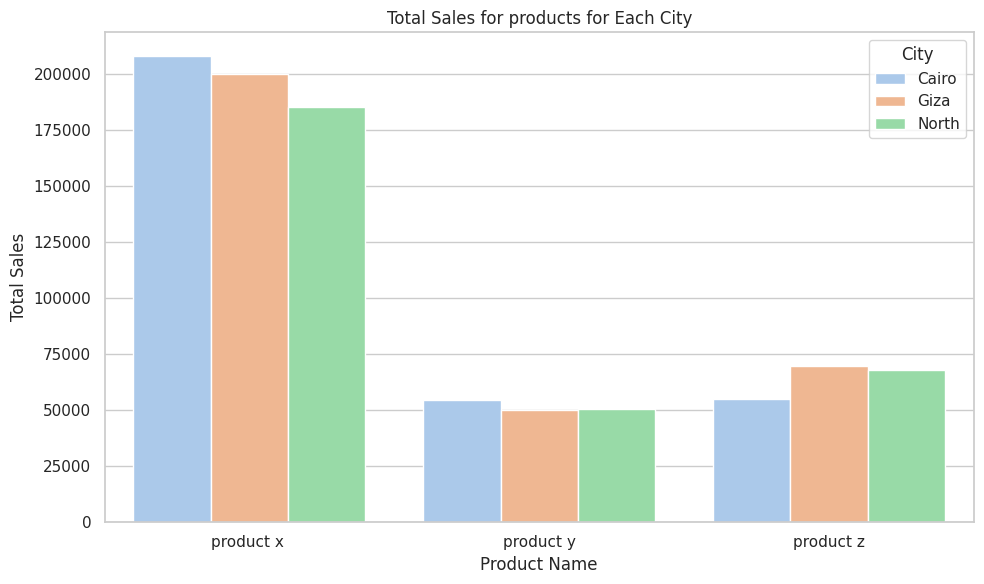

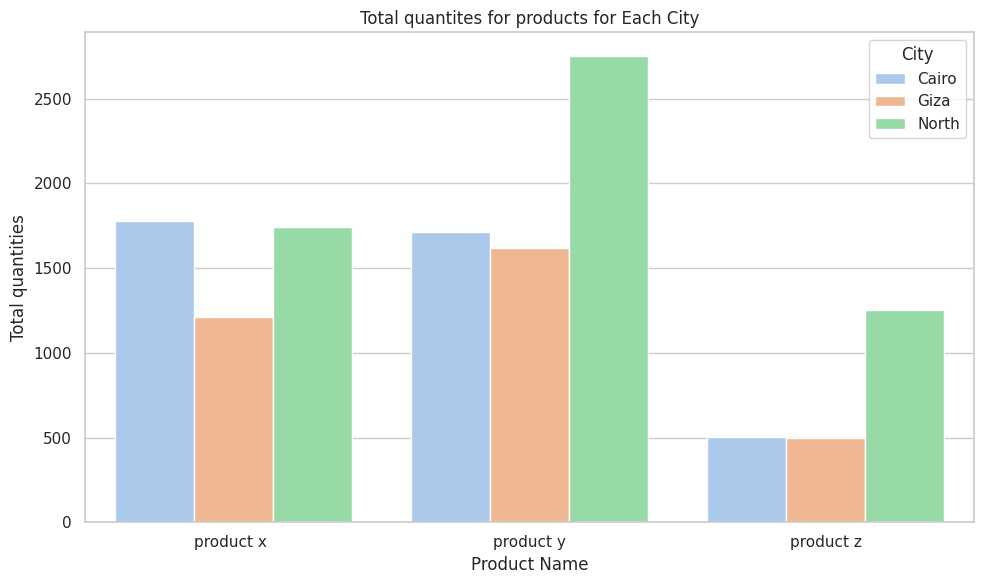

In [ ]:
# Plot total sales by each product for each city
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='sales', hue='city', data=city_sales_by_product,palette="pastel")
plt.title('Total Sales for products for Each City')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.legend(title='City')
plt.tight_layout()
plt.show()


# Plot total quantities by each product for each city
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='quantity', hue='city', data=city_quantity_by_product)
plt.title('Total quantites for products for Each City')
plt.xlabel('Product Name')
plt.ylabel('Total quantities')
plt.legend(title='City')
plt.tight_layout()
plt.show()

###**Insights:**
* Product y has the highest total quantity sold.
* Product z has the lowest total quantity sold.
* Product x has the highest total scales
* product z has the lowest total sacles

\
that  means that **Product x**  is more expensive than **product y** but it is less brought.




## 4- Feature Engineering

In [ ]:
# Create a new feature to identify if the date is a holiday
egypt_holidays = holidays.Egypt()
df_final['is_holiday'] = df_final.index.to_series().apply(lambda x: 1 if x in egypt_holidays else 0)

In [ ]:
# Create time-based features
def create_features(data):
    data['hour'] = data.index.hour
    data['day'] = data.index.dayofweek
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['day_of_month'] = data.index.day
    data['day_of_year'] = data.index.dayofyear
    data['week_of_year'] = data.index.isocalendar().week
    return data

# Apply the feature creation function
df_final = create_features(df_final)
df_final.head()

,quantity,UnitePrice,discount,retail price,product_name,area,city,sales,capped_sales,is_holiday,hour,day,month,year,day_of_month,day_of_year,week_of_year
date,,,,,,,,,,,,,,,,,
2022-04-01 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,Nasr City,Cairo,89.75,89.75,0,0,4,4,2022,1,91,13
2022-04-01 00:00:00+00:00,1.0,16.00,0.0,16.0,product y,El-Seyouf,North,16.00,16.00,0,0,4,4,2022,1,91,13
2022-04-01 00:00:00+00:00,1.0,45.00,29.0,45.0,product z,Nasr City,Cairo,45.00,45.00,0,0,4,4,2022,1,91,13
2022-04-01 00:00:00+00:00,3.0,45.00,31.0,45.0,product z,El-Agamy,North,135.00,135.00,0,0,4,4,2022,1,91,13
2022-04-01 00:00:00+00:00,1.0,45.00,30.0,45.0,product z,San Stefano,North,45.00,45.00,0,0,4,4,2022,1,91,13


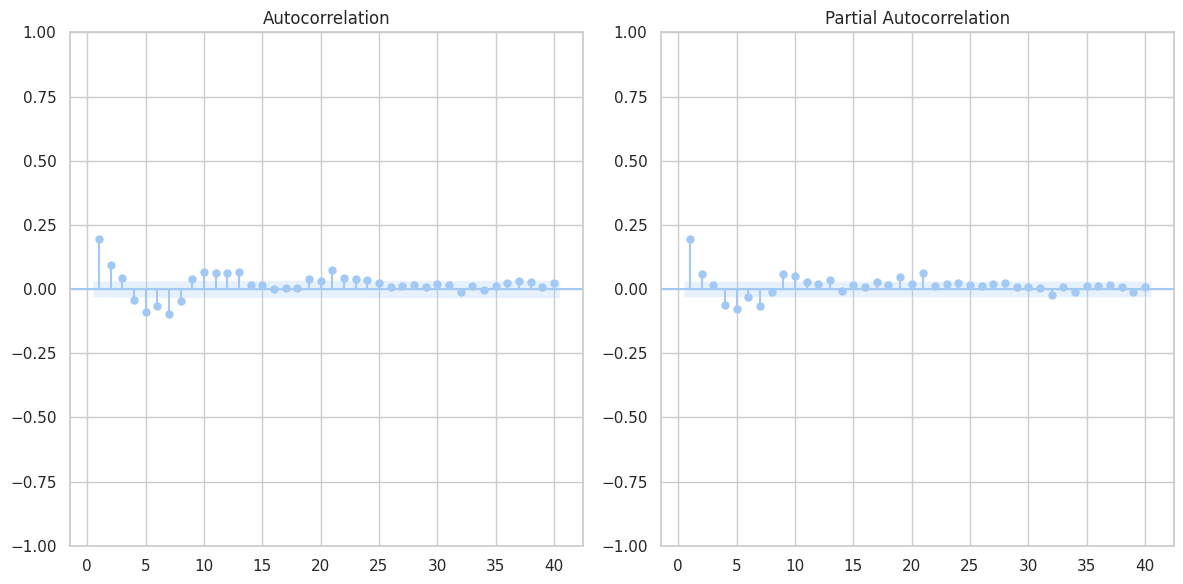

In [ ]:
# Plotting ACF and PACF for the sales data
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df_final['capped_sales'], ax=plt.gca(), lags=40 ,zero=False)

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df_final['capped_sales'], ax=plt.gca(), lags=40,zero=False)

plt.tight_layout()
plt.show()

In [ ]:
## Lag Features and Rolling Statistics
df_final['lag_1'] = df_final.groupby(['city', 'product_name'])['capped_sales'].shift(9)
df_final['lag_2'] = df_final.groupby(['city', 'product_name'])['capped_sales'].shift(13)
df_final['lag_3'] = df_final.groupby(['city', 'product_name'])['capped_sales'].shift(21)
# Rolling features
df_final['rolling_mean_7'] = df_final['capped_sales'].shift(1).rolling(window=7).mean()
df_final['rolling_std_7'] = df_final['capped_sales'].shift(1).rolling(window=7).std()
# drop missing lag features
df_final.dropna(inplace=True)
df_final.head()

,quantity,UnitePrice,discount,retail price,product_name,area,city,sales,capped_sales,is_holiday,...,month,year,day_of_month,day_of_year,week_of_year,lag_1,lag_2,lag_3,rolling_mean_7,rolling_std_7
date,,,,,,,,,,,,,,,,,,,,,
2022-04-10 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,Nasr City,Cairo,89.75,89.75,0,...,4,2022,10,100,14,448.75,89.75,89.75,251.642857,185.139523
2022-04-11 00:00:00+00:00,2.0,89.75,32.0,99.0,product x,New Cairo,Cairo,179.50,179.50,0,...,4,2022,11,101,15,498.75,269.25,89.75,264.708333,172.682195
2022-04-11 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,unknown,Cairo,89.75,89.75,0,...,4,2022,11,101,15,89.75,269.25,448.75,239.065476,169.647425
2022-04-11 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,Heliopolis,Cairo,89.75,89.75,0,...,4,2022,11,101,15,89.75,498.75,179.50,180.636905,131.430125
2022-04-12 00:00:00+00:00,1.0,89.75,32.0,99.0,product x,Nasr City,Cairo,89.75,89.75,0,...,4,2022,12,102,15,498.75,448.75,89.75,253.028912,217.394006


In [ ]:
# Group data by 'city', 'product_name', and 'date', and aggregate the sales for each combination
data = df_final.groupby(['city', 'product_name', 'quantity','date','discount','retail price','is_holiday',
                   'hour', 'day', 'month', 'year', 'day_of_month', 'day_of_year','week_of_year',
                   'lag_1', 'lag_2','lag_3','rolling_mean_7' ,'rolling_std_7']).agg({'capped_sales': 'sum'}).reset_index()

# Sort by city, product, and date for proper time series alignment
data = data.sort_values(by=['city', 'product_name', 'date'])

data.head()

,city,product_name,quantity,date,discount,retail price,is_holiday,hour,day,month,year,day_of_month,day_of_year,week_of_year,lag_1,lag_2,lag_3,rolling_mean_7,rolling_std_7,capped_sales
0,Cairo,product x,1.0,2022-04-10 00:00:00+00:00,32.0,99.0,0,0,6,4,2022,10,100,14,448.75,89.75,89.75,251.642857,185.139523,89.75
1,Cairo,product x,1.0,2022-04-11 00:00:00+00:00,32.0,99.0,0,0,0,4,2022,11,101,15,89.75,269.25,448.75,239.065476,169.647425,89.75
2,Cairo,product x,1.0,2022-04-11 00:00:00+00:00,32.0,99.0,0,0,0,4,2022,11,101,15,89.75,498.75,179.50,180.636905,131.430125,89.75
75,Cairo,product x,2.0,2022-04-11 00:00:00+00:00,32.0,99.0,0,0,0,4,2022,11,101,15,498.75,269.25,89.75,264.708333,172.682195,179.50
3,Cairo,product x,1.0,2022-04-12 00:00:00+00:00,32.0,99.0,0,0,1,4,2022,12,102,15,498.75,448.75,89.75,253.028912,217.394006,89.75


## 5- Time Series Modeling

In [ ]:
# Scale numerical features
numerical_cols = ['discount', 'retail price','week_of_year',
                 'lag_1', 'lag_2','lag_3','rolling_mean_7', 'rolling_std_7' ]
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()

,city,product_name,quantity,date,discount,retail price,is_holiday,hour,day,month,year,day_of_month,day_of_year,week_of_year,lag_1,lag_2,lag_3,rolling_mean_7,rolling_std_7,capped_sales
0,Cairo,product x,1.0,2022-04-10 00:00:00+00:00,0.411013,1.074287,0,0,6,4,2022,10,100,-1.560859,1.775524,-0.675090,-0.667285,0.968811,1.230545,89.75
1,Cairo,product x,1.0,2022-04-11 00:00:00+00:00,0.411013,1.074287,0,0,0,4,2022,11,101,-1.486258,-0.687742,0.584595,1.814662,0.775793,0.891743,89.75
2,Cairo,product x,1.0,2022-04-11 00:00:00+00:00,0.411013,1.074287,0,0,0,4,2022,11,101,-1.486258,-0.687742,2.195167,-0.046798,-0.120881,0.055954,89.75
75,Cairo,product x,2.0,2022-04-11 00:00:00+00:00,0.411013,1.074287,0,0,0,4,2022,11,101,-1.486258,2.118597,0.584595,-0.667285,1.169320,0.958111,179.50
3,Cairo,product x,1.0,2022-04-12 00:00:00+00:00,0.411013,1.074287,0,0,1,4,2022,12,102,-1.486258,2.118597,1.844280,-0.667285,0.990082,1.935930,89.75


In [ ]:
# Convert categorical columns to category type
categorical_cols = ['city', 'product_name']
for col in categorical_cols:
    data[col] = data[col].astype('category')
# Set date as index for time series analysis
data.set_index('date', inplace=True)
data.head()

,city,product_name,quantity,discount,retail price,is_holiday,hour,day,month,year,day_of_month,day_of_year,week_of_year,lag_1,lag_2,lag_3,rolling_mean_7,rolling_std_7,capped_sales
date,,,,,,,,,,,,,,,,,,,
2022-04-10 00:00:00+00:00,Cairo,product x,1.0,0.411013,1.074287,0,0,6,4,2022,10,100,-1.560859,1.775524,-0.675090,-0.667285,0.968811,1.230545,89.75
2022-04-11 00:00:00+00:00,Cairo,product x,1.0,0.411013,1.074287,0,0,0,4,2022,11,101,-1.486258,-0.687742,0.584595,1.814662,0.775793,0.891743,89.75
2022-04-11 00:00:00+00:00,Cairo,product x,1.0,0.411013,1.074287,0,0,0,4,2022,11,101,-1.486258,-0.687742,2.195167,-0.046798,-0.120881,0.055954,89.75
2022-04-11 00:00:00+00:00,Cairo,product x,2.0,0.411013,1.074287,0,0,0,4,2022,11,101,-1.486258,2.118597,0.584595,-0.667285,1.169320,0.958111,179.50
2022-04-12 00:00:00+00:00,Cairo,product x,1.0,0.411013,1.074287,0,0,1,4,2022,12,102,-1.486258,2.118597,1.844280,-0.667285,0.990082,1.935930,89.75


### 1. Data Split

In [ ]:
# Ensure the data is sorted by both date and city
data = data.sort_values(by=['city', 'date'])

# Define split date for the train and test sets
train_end_date = '2022-10-31'
test_start_date = '2022-11-01'

# Split the data into train and test sets
train_data = data[(data.index >= '2022-04-09') & (data.index <= train_end_date)]
test_data = data[data.index >= test_start_date]

# Create features and target values for train and test sets
X_train = train_data.drop(columns=['capped_sales'])
X_test = test_data.drop(columns=['capped_sales'])

y_train = train_data['capped_sales']
y_test = test_data['capped_sales']

# Reset the index for test data
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)


# Ensure that the split data has the correct date range
print("Train data date range:", X_train.index.min(), "to", X_train.index.max())
print("Test data date range:", X_test.index.min(), "to", X_test.index.max())

Train data date range: 2022-04-10 00:00:00+00:00 to 2022-10-31 00:00:00+00:00
Test data date range: 2022-11-01 00:00:00+00:00 to 2023-01-17 00:00:00+00:00


### 2. Model Training and Prediction using LightGBM

In [ ]:
# Prepare LightGBM datasets
train_ds = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
test_ds = lgb.Dataset(X_test, label=y_test, reference=train_ds)

In [ ]:
# Set up LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'n_estimators':1000,
    'learning_rate': 0.05,
    'num_leaves':11,
    'max_depth': 4,
    'verbose': -1,
    'lambda_l1': 20,
    'lambda_l2': 20,
    'min_data_in_leaf': 10,
}

# Train the model
model = lgb.train(params, train_ds, valid_sets=[test_ds], num_boost_round=1000)

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)


### 3. Model Evaluation

In [ ]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mpe = np.mean((y_test - predictions) / y_test)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")
print(f"MPE: {mpe}")
print(f"R²: {r2}")

RMSE: 11.434409206875978
MAE: 4.890429211022436
MSE: 130.74571391029014
MAPE: 3.0804573658174865
MPE: 0.013665810955714331
R²: 0.9936231387917899


### 4. Visualization of Results

In [ ]:
# Prepare results DataFrame
predictions_df = pd.DataFrame(predictions, index=X_test.index, columns=['Predicted Sales'])
results_df = pd.concat([y_test.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)
results_df.columns = ['Actual Sales', 'Predicted Sales']

In [ ]:
# Prepare DataFrame for actual and predicted values by city and product
results_df = X_test.copy()
results_df['Actual Sales'] = y_test
results_df['Predicted Sales'] = predictions
results_df['city'] = X_test['city']
results_df['product_name'] = X_test['product_name']

# Sort the predictions by 'city', 'product_name', and 'date'
results_df.sort_values(by=['city', 'product_name', 'date'], inplace=True)

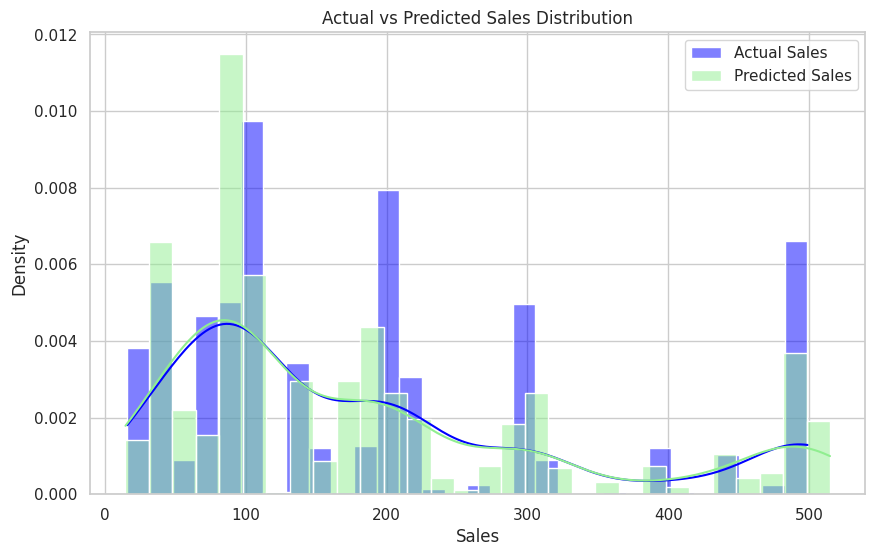

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual Sales', kde=True, stat='density', bins=30)
sns.histplot(predictions, color='lightgreen', label='Predicted Sales', kde=True, stat='density', bins=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Actual vs Predicted Sales Distribution')
plt.legend()
plt.show()


In [ ]:
# Get the last 10 days for each city and product
last_10_days_df = results_df.groupby(['city', 'product_name']).tail(10)

# Sort the DataFrame by date index
last_10_days_df_sorted = last_10_days_df.sort_index()

# Display tables for each city
for city in last_10_days_df_sorted['city'].unique():
    city_data = last_10_days_df_sorted[last_10_days_df_sorted['city'] == city]
    print(f"City: {city}")
    display(city_data[['product_name', 'Actual Sales', 'Predicted Sales']])

City: Cairo


,product_name,Actual Sales,Predicted Sales
date,,,
2022-12-26 00:00:00+00:00,product y,22.00,15.656080
2022-12-26 00:00:00+00:00,product y,132.00,96.541138
2022-12-27 00:00:00+00:00,product y,48.00,47.893696
2022-12-31 00:00:00+00:00,product y,80.00,81.534799
2023-01-01 00:00:00+00:00,product z,45.00,45.418247
2023-01-01 00:00:00+00:00,product y,498.75,471.502358
2023-01-03 00:00:00+00:00,product z,180.00,180.461647
2023-01-03 00:00:00+00:00,product z,45.00,45.241191
2023-01-04 00:00:00+00:00,product z,90.00,89.762830


City: Giza


,product_name,Actual Sales,Predicted Sales
date,,,
2022-12-31 00:00:00+00:00,product y,110.00,81.317682
2023-01-01 00:00:00+00:00,product z,90.00,90.014824
2023-01-02 00:00:00+00:00,product z,135.00,133.694582
2023-01-03 00:00:00+00:00,product z,225.00,228.664037
2023-01-04 00:00:00+00:00,product y,440.00,316.926797
2023-01-04 00:00:00+00:00,product z,90.00,90.432439
2023-01-04 00:00:00+00:00,product z,450.00,441.486977
2023-01-05 00:00:00+00:00,product z,498.75,437.590703
2023-01-05 00:00:00+00:00,product y,320.00,302.880338


City: North


,product_name,Actual Sales,Predicted Sales
date,,,
2023-01-10 00:00:00+00:00,product y,48.00,47.129670
2023-01-11 00:00:00+00:00,product y,66.00,44.921768
2023-01-11 00:00:00+00:00,product y,220.00,165.482690
2023-01-11 00:00:00+00:00,product y,498.75,477.392707
2023-01-11 00:00:00+00:00,product z,135.00,135.301241
2023-01-11 00:00:00+00:00,product z,90.00,90.254952
2023-01-11 00:00:00+00:00,product z,135.00,134.088504
2023-01-11 00:00:00+00:00,product z,225.00,226.085806
2023-01-12 00:00:00+00:00,product z,90.00,90.126818


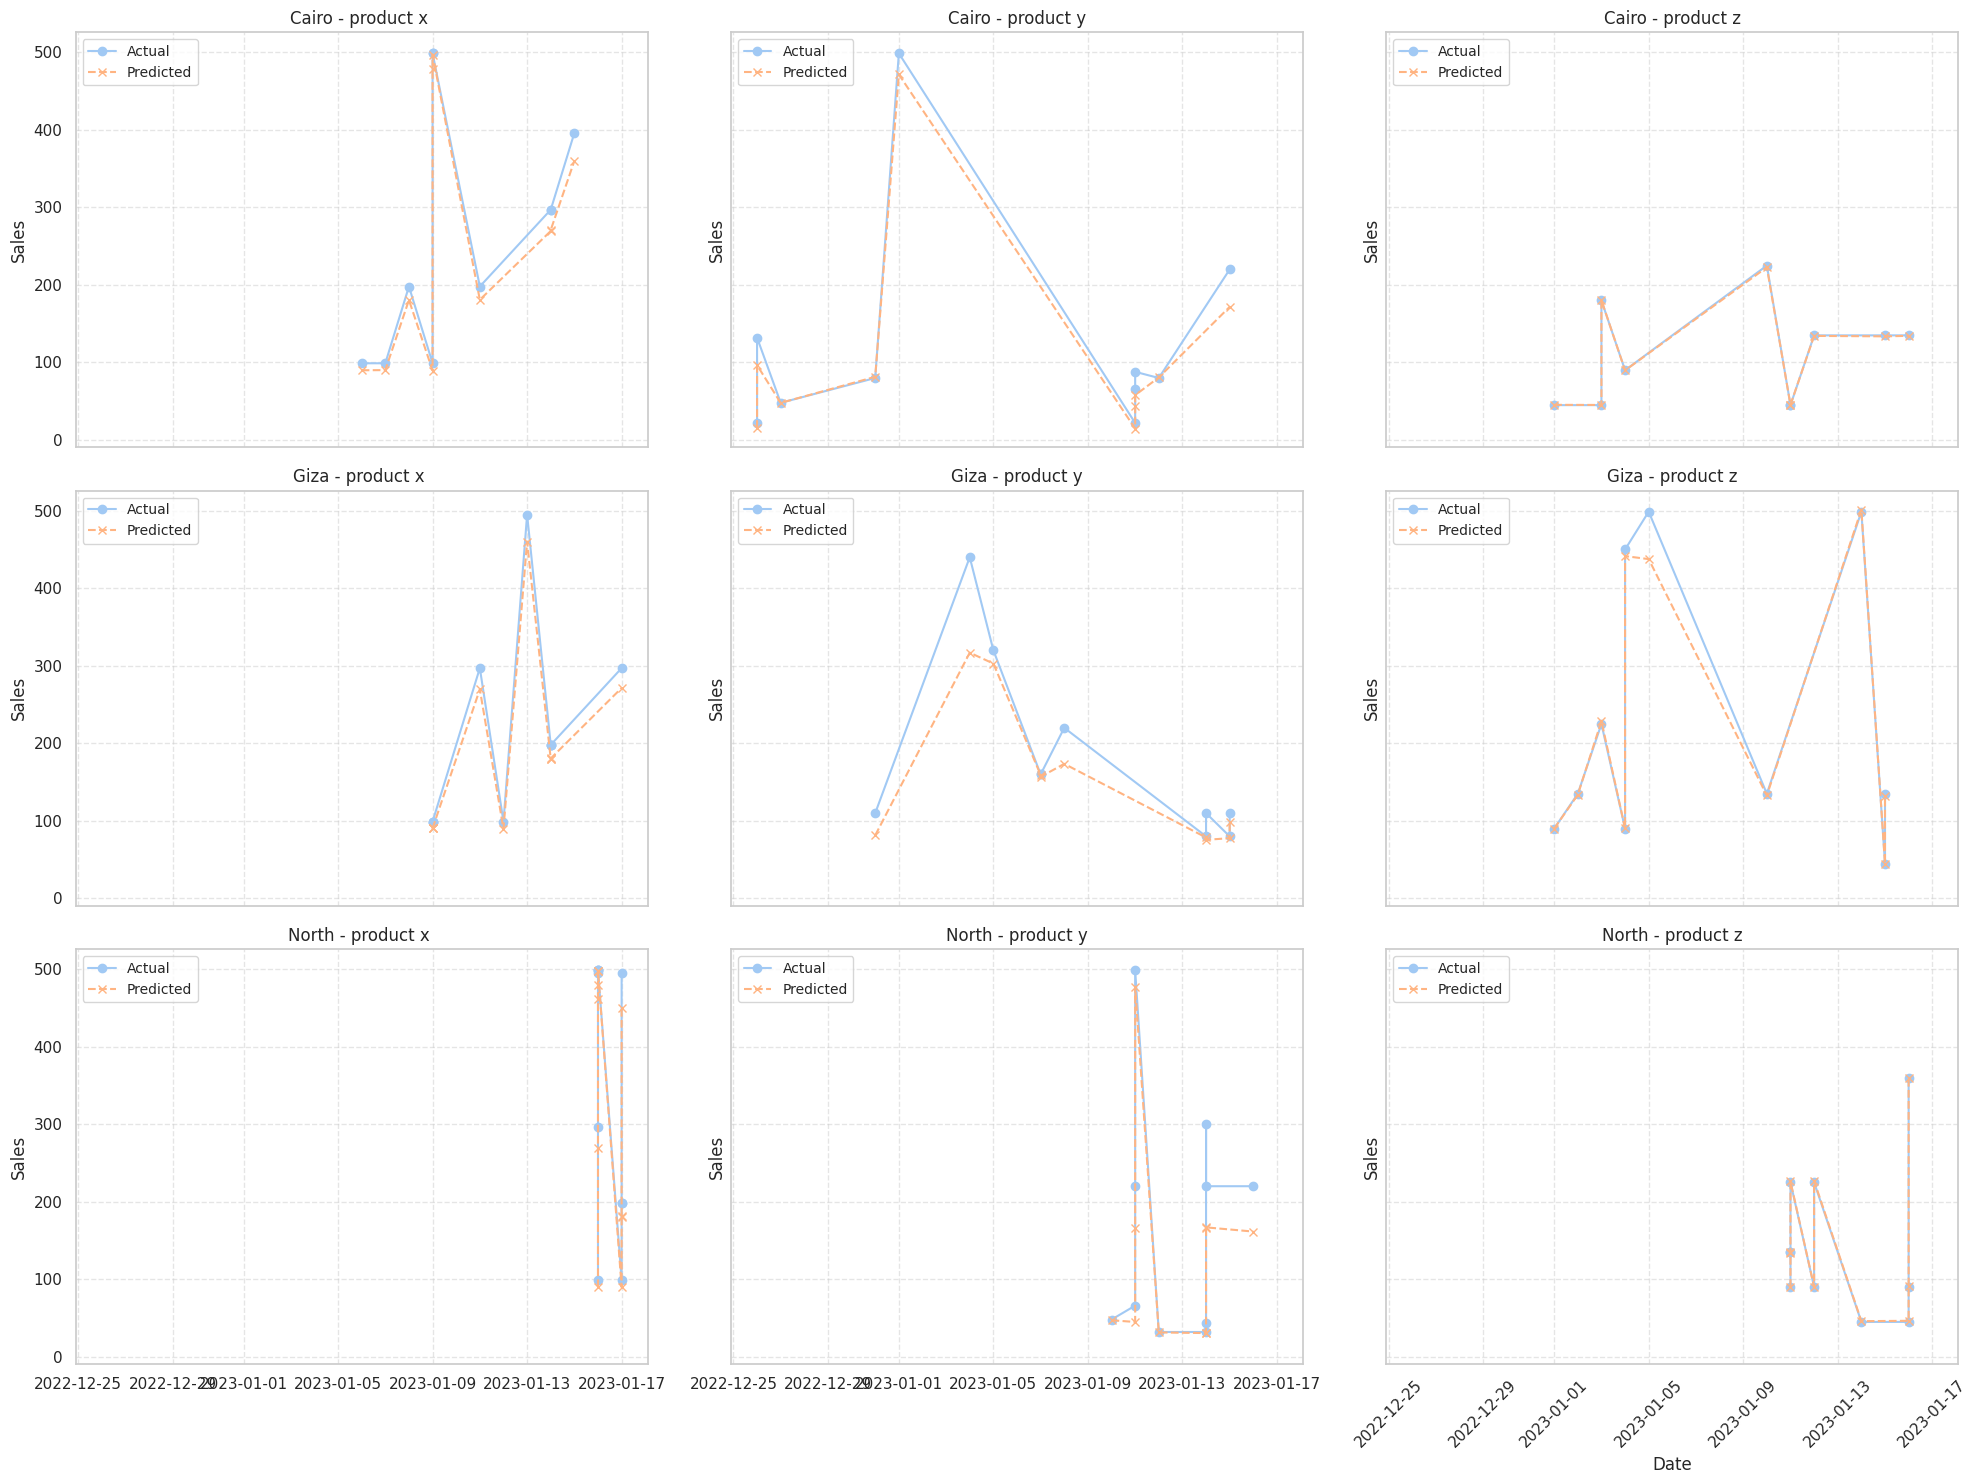

In [ ]:
# Get unique cities and products
cities = last_10_days_df['city'].unique()
products = last_10_days_df['product_name'].unique()

# Determine the number of rows and columns for subplots
n_cities = len(cities)
n_products = len(products)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_cities, n_products, figsize=(20, 5 * n_cities), sharex=True, sharey=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through cities and products, populating each subplot
for i, city in enumerate(cities):
    city_data = last_10_days_df[last_10_days_df['city'] == city]

    for j, product in enumerate(products):
        product_data = city_data[city_data['product_name'] == product]

        # Plotting actual vs predicted sales for each city and product
        axes[i * n_products + j].plot(product_data.index, product_data['Actual Sales'], label=f'Actual', marker='o')
        axes[i * n_products + j].plot(product_data.index, product_data['Predicted Sales'], label=f'Predicted', linestyle='--', marker='x')

        # Set title for each subplot
        axes[i * n_products + j].set_title(f'{city} - {product}')
        axes[i * n_products + j].set_ylabel('Sales')
        axes[i * n_products + j].grid(True, linestyle='--', alpha=0.5)

# Set common xlabel for all subplots
plt.xlabel('Date')
plt.xticks(rotation=45)

# Add a legend to each subplot
for ax in axes:
    ax.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


## 6- Conclusion

**In this project**, we aimed to predict the sales for the next 10 days for each product across various cities, utilizing a comprehensive approach that included data cleaning, exploratory data analysis (EDA), feature engineering, and model evaluation. Throughout the analysis, we identified key insights related to sales trends by city and day of the week, allowing us to understand the underlying patterns in the data.
\
**Evaluation metrics** To assess the effectiveness of our predictive model, we employed several regression evaluation metrics:

* Root Mean Square Error (RMSE): 11.45
* Mean Absolute Error (MAE): 4.9
* Mean Squared Error (MSE): 131.2
* Mean Absolute Percentage Error (MAPE): 3.10%
* Mean Percentage Error (MPE): 0.014%
* R-squared (R²): 0.994 \

These metrics indicate that our model performed exceptionally well, with a high R² value of 0.99, suggesting that the model explains a significant portion of the variance in the sales data. The low RMSE and MAE values further demonstrate the model's accuracy in forecasting sales.


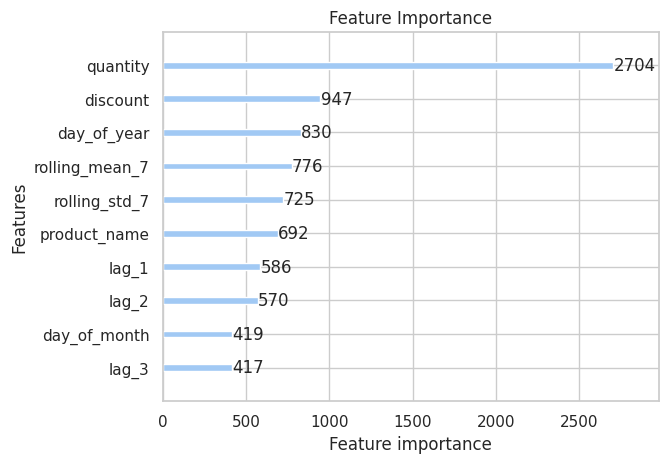

In [ ]:
# Feature importance plot
lgb.plot_importance(model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()